<i style="color:blue"><b style="font-size:30px">Import required libraries</b></i>

In [49]:
import numpy as np        #for linear algebra
import pandas as pd       #for preprocessing
import matplotlib.pyplot as plt
import seaborn as sns     #visualization
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')


<i style="color:blue"><b style="font-size:30px">Reading our data </b></i>

In [50]:
df= pd.read_csv("testset.csv" , parse_dates=['datetime_utc'], index_col='datetime_utc')
df.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [51]:
df.tail()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
2017-04-24 06:00:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
2017-04-24 09:00:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
2017-04-24 12:00:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
2017-04-24 15:00:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
2017-04-24 18:00:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [52]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


<i style="color:blue"><b style="font-size:30px">Feature engineering </b></i>

In [53]:
df.shape

(100990, 19)

In [54]:
#we need to choose columns we need in our forecast
df= df.rename(columns={' _conds': 'condition', ' _hum': 'humidity', ' _tempm': 'temperature'})
weather_df = df[["condition","humidity","temperature"]].copy()


In [55]:
weather_df.head()

,condition,humidity,temperature
datetime_utc,,,
1996-11-01 11:00:00,Smoke,27.0,30.0
1996-11-01 12:00:00,Smoke,32.0,28.0
1996-11-01 13:00:00,Smoke,44.0,24.0
1996-11-01 14:00:00,Smoke,41.0,24.0
1996-11-01 16:00:00,Smoke,47.0,23.0


In [56]:
weather_df.dtypes #in our output we notice everything is fine 

condition       object
humidity       float64
temperature    float64
dtype: object

In [57]:
weather_df.index.dtype

dtype('<M8[ns]')

In [58]:
weather_df.index #our index is a datetime so its cool!

DatetimeIndex(['1996-11-01 11:00:00', '1996-11-01 12:00:00',
               '1996-11-01 13:00:00', '1996-11-01 14:00:00',
               '1996-11-01 16:00:00', '1996-11-01 17:00:00',
               '1996-11-01 18:00:00', '1996-11-01 19:00:00',
               '1996-11-01 20:00:00', '1996-11-01 21:00:00',
               ...
               '2017-04-23 15:00:00', '2017-04-23 18:00:00',
               '2017-04-23 21:00:00', '2017-04-24 00:00:00',
               '2017-04-24 03:00:00', '2017-04-24 06:00:00',
               '2017-04-24 09:00:00', '2017-04-24 12:00:00',
               '2017-04-24 15:00:00', '2017-04-24 18:00:00'],
              dtype='datetime64[ns]', name='datetime_utc', length=100990, freq=None)

<i style="color:blue"><b style="font-size:30px">Data cleaning </b></i>

<i><b style="font-size:20px">Missing values </b></i>

In [59]:
weather_df.isna().sum()

condition       72
humidity       757
temperature    673
dtype: int64

In [60]:
#we notice that we dont have much missing data so in this case we are going to fullfil the missing values 
weather_df.ffill(inplace=True)

In [61]:
weather_df.isna().sum()

condition      0
humidity       0
temperature    0
dtype: int64

<i><b style="font-size:20px">Check out of outliers </b></i>

In [62]:
weather_df.describe()

,humidity,temperature
count,100990.000000,100990.000000
mean,57.957422,25.438222
std,23.821218,8.487994
min,4.000000,1.000000
25%,39.000000,19.000000
50%,59.000000,27.000000
75%,78.000000,32.000000
max,243.000000,90.000000


In [63]:
#It is showing maximum temprature as 90 and max humidity as 243 which is non-realistic, so is an outlier. 
#We need to treat these outliers.
max_hum = 100
max_temp = 50
print(np.where(weather_df['humidity']>max_hum))
print(np.where(weather_df['temperature']>max_temp))



(array([61570, 73296, 95248], dtype=int64),)
(array([11084, 12951, 68077, 91391], dtype=int64),)


In [64]:
weather_df.drop(weather_df[weather_df['humidity']>max_hum].index,axis= 0 ,inplace =True)
weather_df.drop(weather_df[weather_df['temperature']>=max_temp].index,axis= 0 ,inplace =True)


<AxesSubplot:xlabel='temperature'>

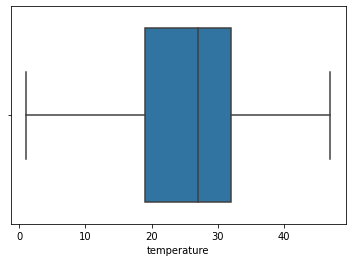

In [65]:
sns.boxplot(weather_df['temperature'])


<AxesSubplot:xlabel='humidity'>

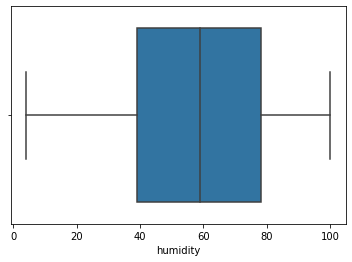

In [66]:
sns.boxplot(weather_df['humidity'])

In [67]:
weather_df.describe()


,humidity,temperature
count,100983.000000,100983.000000
mean,57.955309,25.436361
std,23.805467,8.482944
min,4.000000,1.000000
25%,39.000000,19.000000
50%,59.000000,27.000000
75%,78.000000,32.000000
max,100.000000,47.000000


<i style="color:blue"><b style="font-size:30px">Exploratory Data Analysis & Visualizations </b></i>

<AxesSubplot:>

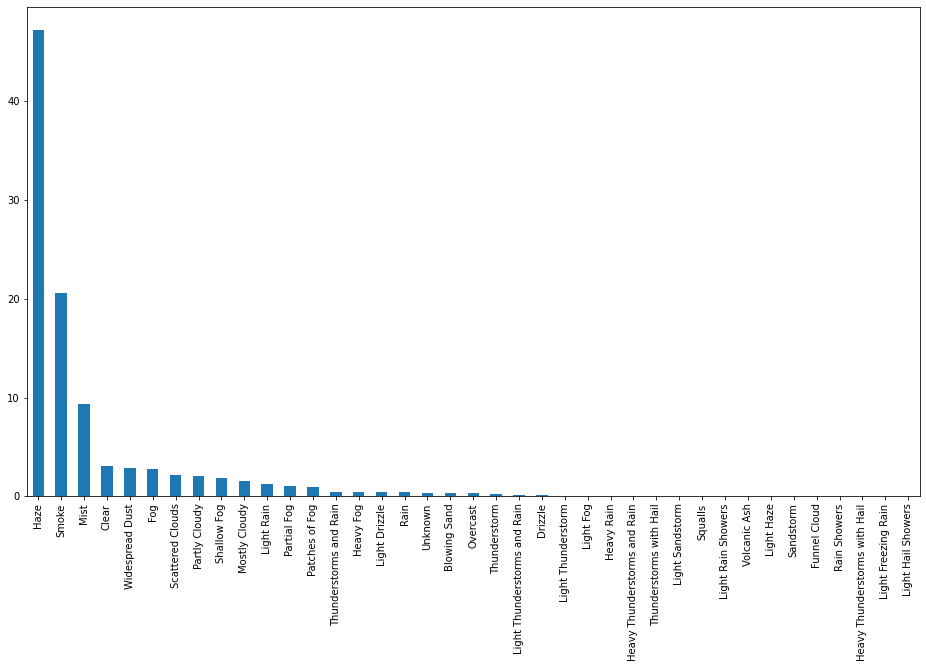

In [68]:
#Let's checkout the most common weather condition type in Delhi.
weather_condition = weather_df.condition.value_counts()/(weather_df.condition.value_counts().sum())*100
weather_condition.plot.bar(figsize=(16,9))


<i style="font-size:16px">We notice that the most common weather condition in Delhi is Haze and Smoke </i>


<i><b style="font-size:20px">Data plot </b></i>



array([<AxesSubplot:xlabel='datetime_utc'>,
       <AxesSubplot:xlabel='datetime_utc'>], dtype=object)

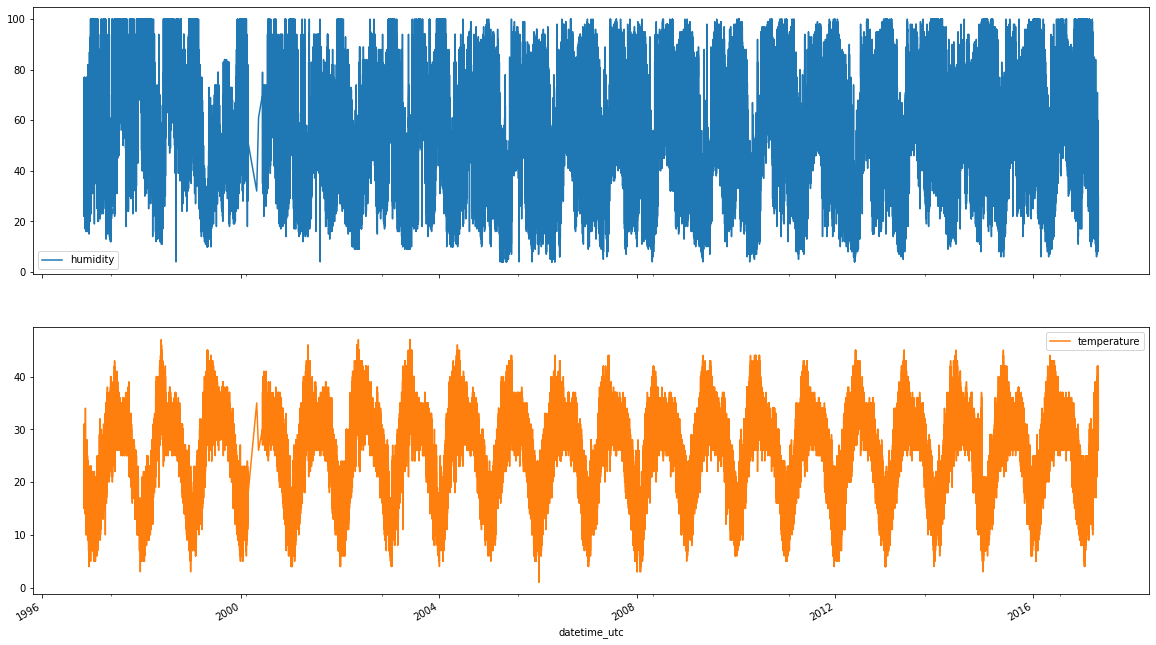

In [69]:
weather_df.plot(subplots=True, figsize=(20,12))

array([<AxesSubplot:xlabel='datetime_utc'>,
       <AxesSubplot:xlabel='datetime_utc'>], dtype=object)

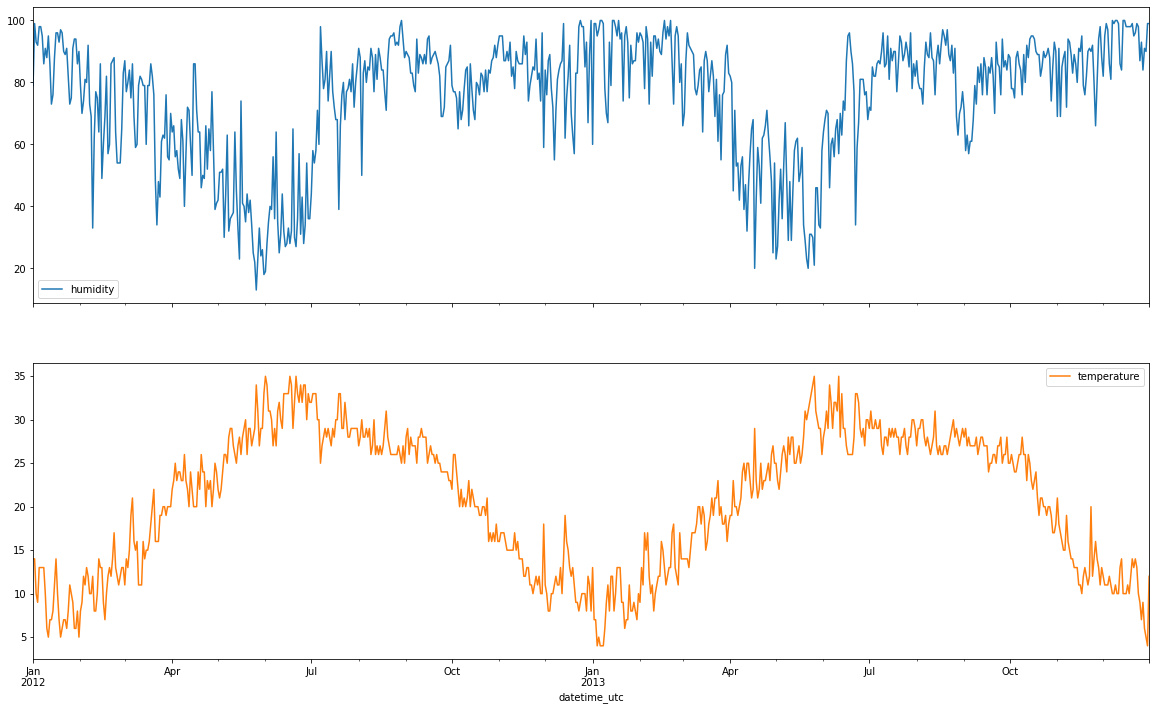

In [70]:
#It seems overplotted, let's plot for only two years 2012 and 2013, it will give us the clear picture of seasonality and trend
weather_df['2012':'2013'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

In [71]:
print(weather_df)

                    condition  humidity  temperature
datetime_utc                                        
1996-11-01 11:00:00     Smoke      27.0         30.0
1996-11-01 12:00:00     Smoke      32.0         28.0
1996-11-01 13:00:00     Smoke      44.0         24.0
1996-11-01 14:00:00     Smoke      41.0         24.0
1996-11-01 16:00:00     Smoke      47.0         23.0
...                       ...       ...          ...
2017-04-24 06:00:00      Haze      25.0         34.0
2017-04-24 09:00:00      Haze      16.0         38.0
2017-04-24 12:00:00      Haze      14.0         36.0
2017-04-24 15:00:00      Haze      27.0         32.0
2017-04-24 18:00:00      Haze      30.0         30.0

[100983 rows x 3 columns]


<i style="font-size:17px">We notice our data has seasonality</i>

<i><b style="font-size:20px">Train/test split </b></i>

In [72]:
train_df = weather_df['2000':'2015'].resample('M').mean().fillna(method='pad')
train_df.drop(columns='humidity', axis=1, inplace=True)
test_df = weather_df['2016':'2017'].resample('M').mean().fillna(method='pad')
test_df.drop(columns='humidity', axis=1, inplace=True)

<i><b style="font-size:20px">Checking if the data is stationary or not </b></i>

In [73]:
#if we want to check the stationary we have two methods: 
# rolling statitics
#Dicky_fuller_test
#Kpss test

In [74]:
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [75]:
def perform_dicky_fuller_test(ts):
    result = adfuller(ts)
    print('ADF statistics : {} '.format(result[0]))
    print('p_value : {} '.format(result[1]))
    print('critical values : {} '.format(result[4]))

perform_dicky_fuller_test(train_df)

ADF statistics : -2.1269952502980334 
p_value : 0.2337991136695925 
critical values : {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012} 


In [76]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(train_df)

KPSS Statistic: 0.05465780678600188
p-value: 0.1
num lags: 15
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


 <i style="font-size:17px"> From ADF test and Kpss test we can say our time series is trend stationary </i>

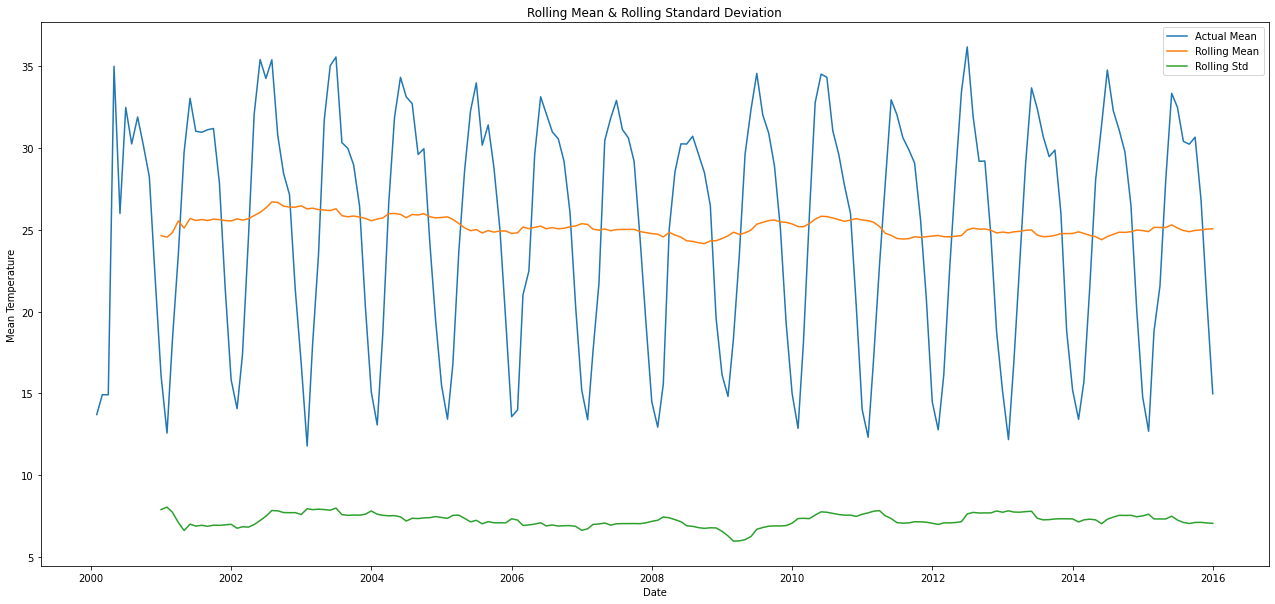

In [120]:
plot_rolling_mean_std(train_df) 

<i style="font-size:17px"> We notice the mean and the variance dont change much over time   </i>

<i><b style="font-size:20px">Looking for Sarima parameters </b></i>

In [77]:
import pmdarima as pm
model = pm.auto_arima(train_df, error_action='ignore', trace=1,
                      suppress_warnings=True,
                      seasonal=True, m=12)
print(model.summary()) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=778.782, Time=1.68 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1297.117, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1041.306, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1799.813, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=855.282, Time=1.11 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=5.69 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=920.710, Time=0.66 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=787.410, Time=3.77 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=770.124, Time=1.32 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=971.474, Ti

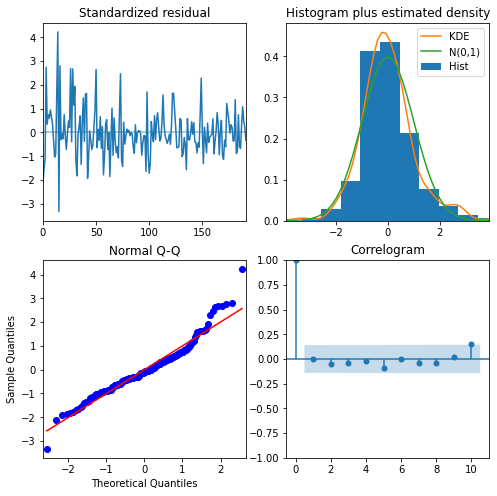

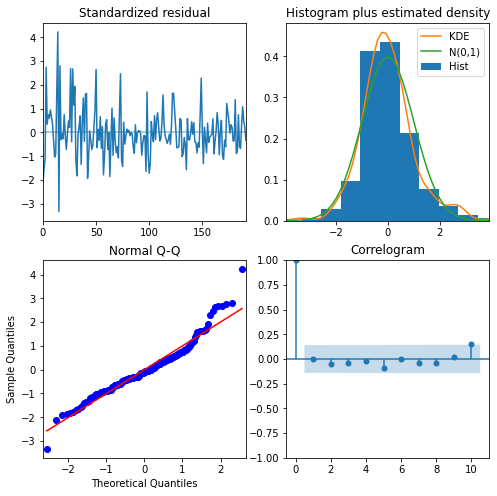

In [78]:
model.plot_diagnostics(figsize=(8,8))

<i style="font-size:17px"> Our model is working fine </i>

In [91]:
mod = sm.tsa.statespace.SARIMAX(train_df, order=(1,0,2), seasonal_order=(1,0,1,12))
model_fit= mod.fit(disp=False)
print(res.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          temperature   No. Observations:                  192
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -387.351
Date:                              Fri, 11 Feb 2022   AIC                            786.701
Time:                                      01:30:34   BIC                            806.246
Sample:                                  01-31-2000   HQIC                           794.617
                                       - 12-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9982      0.008    119.822      0.000       0.982       1.015
ma.L1         -0.87

In [96]:
mod = sm.tsa.statespace.SARIMAX(train_df,order=(1, 0, 2),
              seasonal_order=(1, 0, 1, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = mod.fit()

In [105]:
forecast = results.predict(start = len(train_df),
                           end=len(train_df)+30,
                           typ='levels')   
                           

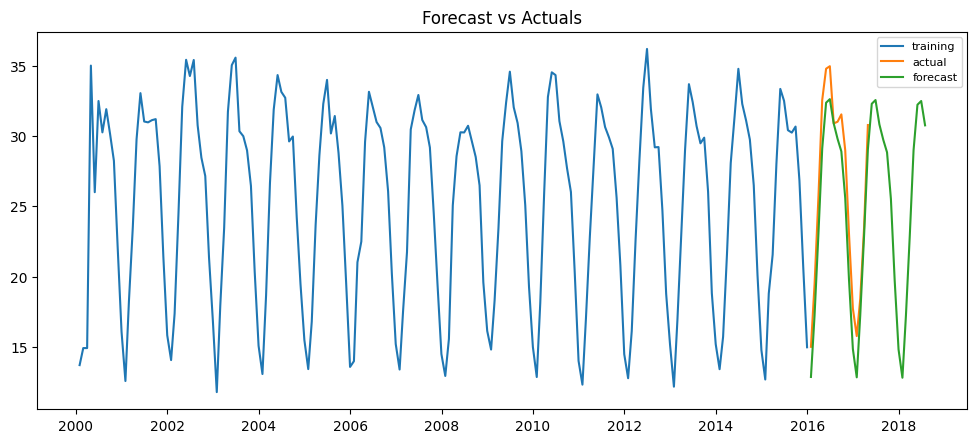

In [119]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper right', fontsize=8)
plt.show()